In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import warnings

warnings.filterwarnings('ignore')

# Load the datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Display the first few rows of each dataset
print(customers_df.head())
print(products_df.head())
print(transactions_df.head())

# Check for missing values
print(customers_df.isnull().sum())
print(products_df.isnull().sum())
print(transactions_df.isnull().sum())

# Basic information about the datasets
print(customers_df.info())
print(products_df.info())
print(transactions_df.info())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

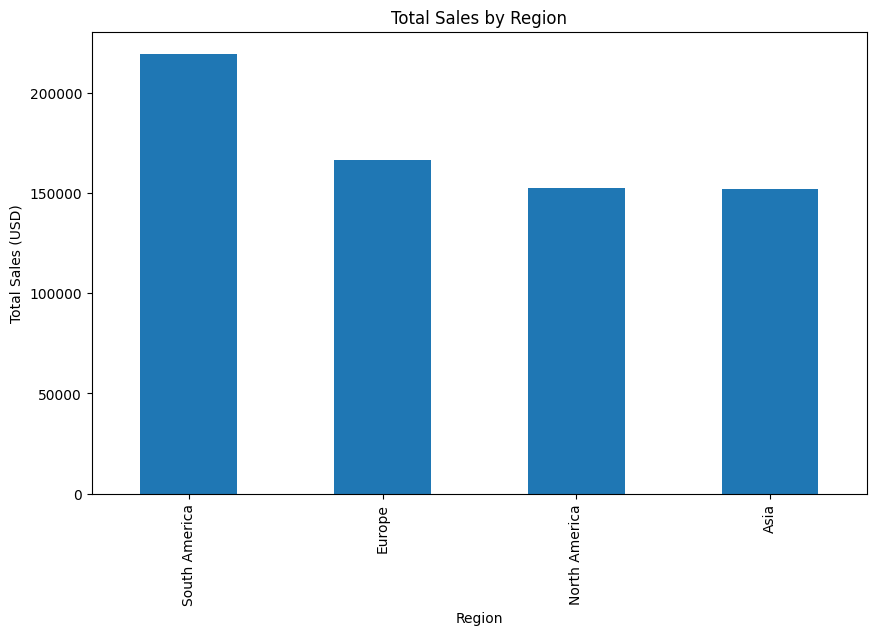

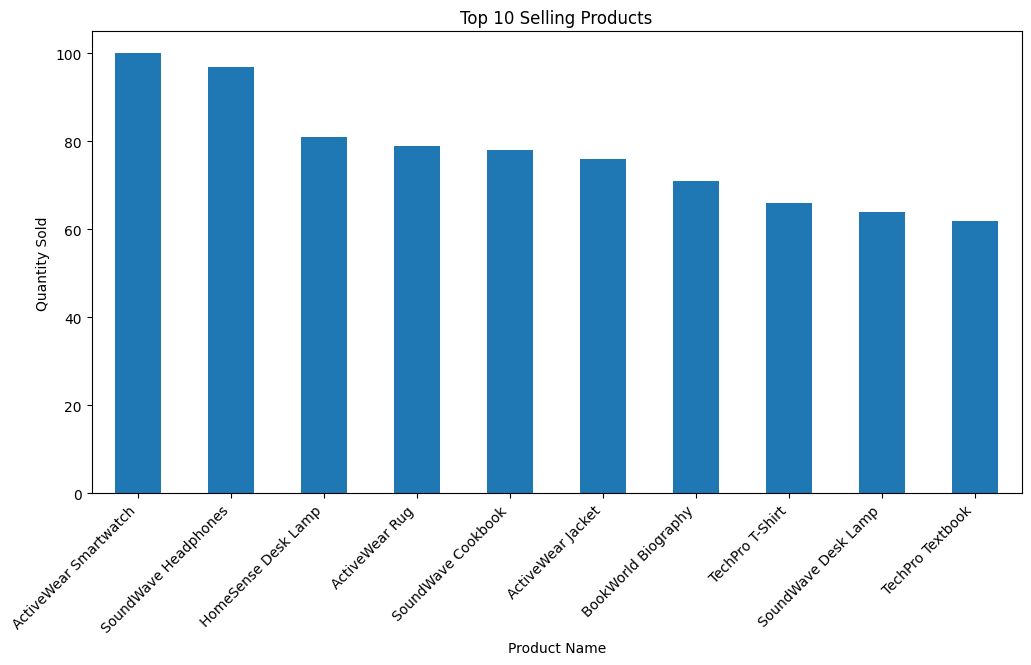

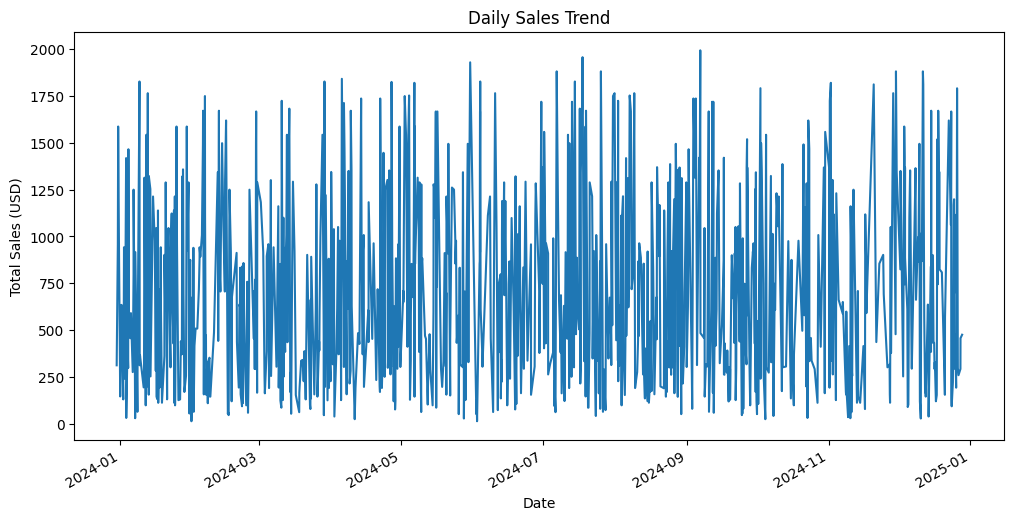

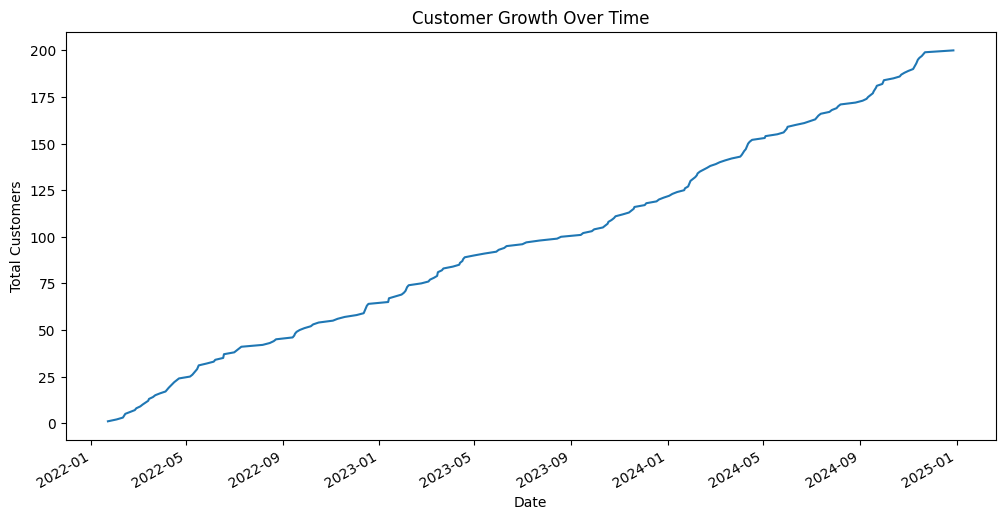

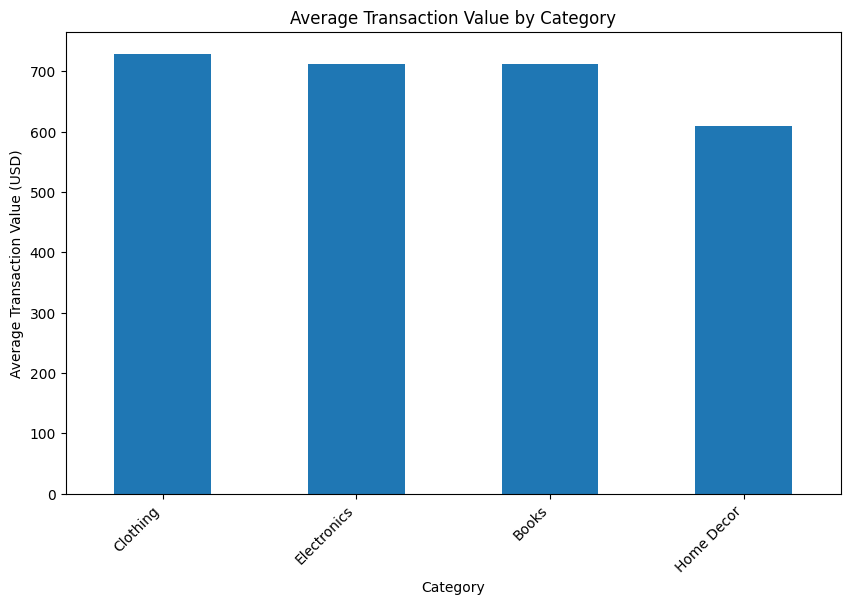

In [3]:
merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

# 1. Total sales by region

region_sales = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.show()

# 2. Top 10 selling products
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

# 3. Sales trend over time
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
daily_sales = merged_df.groupby('TransactionDate')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales (USD)')
plt.show()

# 4. Customer acquisition over time
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
customer_growth = customers_df.groupby('SignupDate').size().cumsum()
plt.figure(figsize=(12, 6))
customer_growth.plot()
plt.title('Customer Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Total Customers')
plt.show()

# 5. Average transaction value by category
avg_transaction_by_category = merged_df.groupby('Category')['TotalValue'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_transaction_by_category.plot(kind='bar')
plt.title('Average Transaction Value by Category')
plt.xlabel('Category')
plt.ylabel('Average Transaction Value (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()